In [1]:
from settings_load import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def load_edgelist_csv(csv_name: str) -> pd.DataFrame:
    """
    Load user, count dataframe from csv
    :type csv_name: str
    """
    path = os.path.join(settings.GRAPHS_DIR, csv_name)
    dataframe = pd.read_csv(path, header=0)
    dataframe["i"] = dataframe["i"].astype("string")
    dataframe["j"] = dataframe["j"].astype("string")
    return dataframe

In [3]:
def load_vertexlist_csv(csv_name: str) -> pd.DataFrame:
    """
    Load user, count dataframe from csv
    :type csv_name: str
    """
    path = os.path.join(settings.GRAPHS_DIR, csv_name)
    dataframe = pd.read_csv(path, header=0)
    dataframe["i"] = dataframe["i"].astype("string")
    return dataframe

In [4]:
def plot_column_hist(df:pd.DataFrame, list_type:str, col:str, year:str, topn:str):
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.2)
    
    #plt.title(f"{list_type} list {col} for the top {topn} subreddits from {year}")
    plt.xlabel(" ")
    plt.ylabel('Number of subreddits')

    df[col].hist(ax=ax, log=True, bins=100, grid=False, color='#6b6b6b')
    
    plt.savefig(os.path.join(settings.FIGURES_DIR, f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.{list_type}~{col}.pdf")) # bbox_inches='tight'
    

# Settings

In [5]:
year = "2005-2019"
topn = "10000"

# Edge list Data Frame

In [6]:
edge_df = load_edgelist_csv(f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.edge.csv")
edge_df

,i,j,U_ij,degree_i,degree_j,weighted-degree_i,weighted-degree_j,avg-weighted-edge-weight_i,avg-weighted-edge-weight_j,W_ij
0,PewdiepieSubmissions,memes,374674,9998,9998,34897630.0,79907269.0,3490.461092,7992.325365,65.258376
1,dating_advice,medical,3830,9998,9998,15595055.0,4830912.0,1559.817463,483.187838,3.749378
2,dating_advice,AskDocs,12379,9998,9998,15595055.0,14715081.0,1559.817463,1471.802460,8.166591
3,dating_advice,valkyrie_en,90,9998,9983,15595055.0,411429.0,1559.817463,41.212962,0.112428
4,dating_advice,headphones,4547,9998,9998,15595055.0,14356181.0,1559.817463,1435.905281,3.035661
...,...,...,...,...,...,...,...,...,...,...
49966780,FIFACoins,WalgreensStores,1,9045,9990,283217.0,337543.0,31.311996,33.788088,0.030722
49966781,IsaacArthur,poketradereferences,1,9989,9786,592296.0,842327.0,59.294824,86.074699,0.013758
49966782,illnessfakers,codbo,1,9989,9647,798939.0,799820.0,79.981880,82.908676,0.012278
49966783,SteamGameSwap,DadsAndBoys,1,9995,9973,6943646.0,339894.0,694.711956,34.081420,0.002744


## Determine edges to filter graph


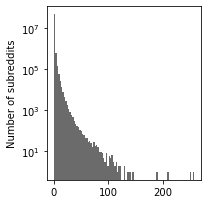

In [7]:
plot_column_hist(edge_df, "Edge", "W_ij", year, topn)

In [8]:
                 
df_mask=edge_df['W_ij']>=30
filtered_df = edge_df[df_mask]
filtered_df = filtered_df.sort_values(by='W_ij', ascending=False)
filtered_df

,i,j,U_ij,degree_i,degree_j,weighted-degree_i,weighted-degree_j,avg-weighted-edge-weight_i,avg-weighted-edge-weight_j,W_ij
9671977,xDACplatform,cotrader,1950,9949,9942,73066.0,77399.0,7.344055,7.785053,257.781226
475978,cotrader,Qobit,1451,9942,9902,77399.0,36723.0,7.785053,3.708645,252.486188
2126074,hcteams,kohi,6377,9990,9994,303922.0,304554.0,30.422623,30.473684,209.437988
5217494,JeremyFrieser,Gamemeneersubmissies,4954,9971,9961,189039.0,330915.0,18.958881,33.221062,189.881388
797,AskReddit,funny,4148758,9998,9998,321102092.0,249839200.0,32116.632527,24988.917784,145.301393
...,...,...,...,...,...,...,...,...,...,...
30336,creepy,sports,208997,9998,9998,64121254.0,75145901.0,6413.408082,7516.093319,30.007822
24828,GetMotivated,IAmA,328000,9998,9998,63265996.0,155316605.0,6327.865173,15534.767453,30.005536
51626,instant_regret,Whatcouldgowrong,187238,9998,9998,53213226.0,71566161.0,5322.387077,7158.047710,30.005044
3762441,txstate,sanmarcos,1301,9998,9997,436857.0,430155.0,43.694439,43.028409,30.003627


## Edge list column plots

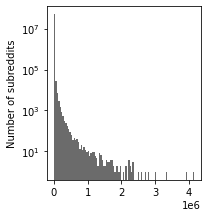

In [9]:
plot_column_hist(edge_df, "Edge", "U_ij", year, topn)

In [10]:
def plot_column_hist_degree(df:pd.DataFrame, list_type:str, col:str, year:str, topn:str):
    fig, ax = plt.subplots(figsize=(3, 3))
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.tight_layout()
    
    #plt.title(f"{list_type} list {col} for the top {topn} subreddits from {year}")
    plt.xlabel(" ")
    plt.ylabel('Number of subreddits')

    df[col].hist(ax=ax, log=True, bins=100, grid=False, color='#6b6b6b')
    
    plt.savefig(os.path.join(settings.FIGURES_DIR, f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.{list_type}~{col}.pdf"), bbox_inches='tight')
    

Uij. User in beiden subreddits. Zeigt wenige wichtige Kanten.

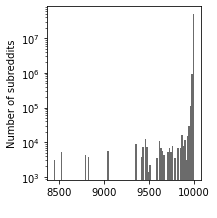

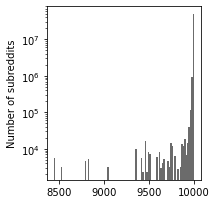

In [11]:
plot_column_hist(edge_df, "Edge", "degree_i", year, topn)
plot_column_hist(edge_df, "Edge", "degree_j", year, topn)


Viele subreddits sind "hyperconnected", linke hälfte zeigt die subreddits die stärker isoliert sind. (X achse nicht von 0-1)

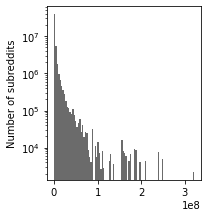

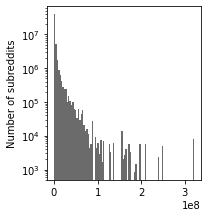

In [12]:
plot_column_hist(edge_df, "Edge", "weighted-degree_i", year, topn)
plot_column_hist(edge_df, "Edge", "weighted-degree_j", year, topn)

Rechte hälfte eher: Freunde, Verbündete, Gleiche, Nahestehende.

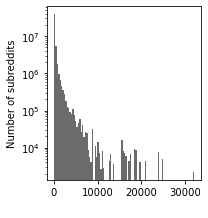

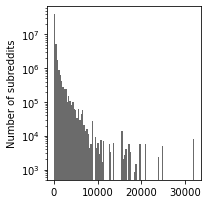

In [13]:
plot_column_hist(edge_df, "Edge", "avg-weighted-edge-weight_i", year, topn)
plot_column_hist(edge_df, "Edge", "avg-weighted-edge-weight_j", year, topn)

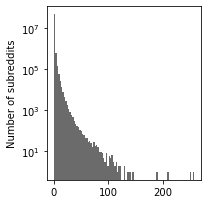

In [14]:
plot_column_hist(edge_df, "Edge", "W_ij", year, topn)

# Vertex list data frame

In [15]:
vertex_df = load_vertexlist_csv(f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.vertex.csv")
vertex_df

,i,Ui,degree,weighted-degree,degree-degree,weighted-degree-degree,local-clustering-coefficient
0,tf2,18944762,9998,1894.855171,99923572,5.330026e+07,0.999635
1,SCP,9792195,9998,979.415383,99923572,5.330216e+07,0.999635
2,CrazyIdeas,29456805,9998,2946.269754,99923572,5.329928e+07,0.999635
3,jailbreakdevelopers,364021,9996,36.416667,99905264,5.330509e+07,0.999669
4,LinusTechTips,2437998,9998,243.848570,99923572,5.330561e+07,0.999635
...,...,...,...,...,...,...,...
9994,tdi,891744,9998,89.192238,99923572,5.330711e+07,0.999635
9995,CK2GameOfthrones,1491944,9998,149.224245,99923572,5.330616e+07,0.999635
9996,Supernatural,4651567,9998,465.249750,99923572,5.330407e+07,0.999635
9997,delhi,543846,9995,54.411806,99894894,5.330115e+07,0.999662


## Vertex list column plots

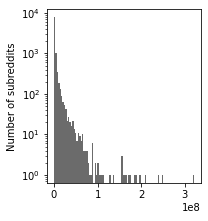

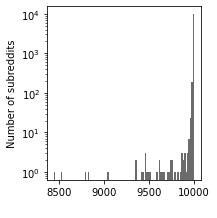

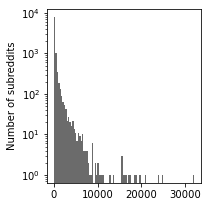

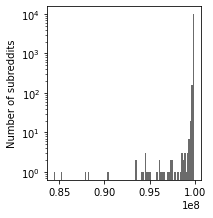

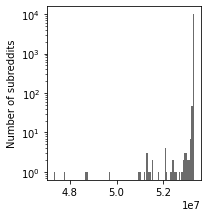

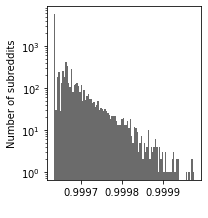

In [16]:
plot_column_hist(vertex_df, "Vertex", "Ui", year, topn)
plot_column_hist(vertex_df, "Vertex", "degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "weighted-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "degree-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "weighted-degree-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "local-clustering-coefficient", year, topn)